In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/h1-ml1/article_metadata.hd5
/kaggle/input/h1-ml1/val_scores.hd5
/kaggle/input/h1-ml1/main_dev_sample.hd5
/kaggle/input/h1-ml1/targets.hd5


In [61]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


2021-10-05 08:45:14.188055: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-05 08:45:14.188549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 08:45:14.189321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-05 08:45:14.189467: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-05 08:45:14.189523: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-05 08:45:14.189555: I tensorflow/stream_executor/platform/

In [62]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [63]:
main_dev_sample = pd.read_hdf("/kaggle/input/h1-ml1/main_dev_sample.hd5")

UnknownTimeZoneError: 'cdateutil.tz.win\ntzwin\np0\n(VUTC\np1\ntp2\nRp3\n.'

In [83]:
article_metadata = pd.read_hdf("/kaggle/input/h1-ml1/article_metadata.hd5")
targets = pd.read_hdf("/kaggle/input/h1-ml1/targets.hd5")
val_scores = pd.read_hdf("/kaggle/input/h1-ml1/val_scores.hd5")

In [84]:
article_metadata

,title,description,source.name,symbols,industries,sectors,time zone,news_id
0,Biden assails Trump for 'bald-faced lies' abou...,Democratic presidential candidate Joe Biden sa...,Reuters,[],[],[],UTC 0,8557db1542d25f5d274fec9e35a8929c
1,NexPoint Strategic Opportunities Fund Declares...,NexPoint Strategic Opportunities Fund (NYSE: N...,PR Newswire,[NHF],[Asset Management],[Financial Services],UTC 0,f1db5f23dfc994334edd5cf8a0965ab5
2,Kayne Anderson MLP/Midstream Investment Compan...,"HOUSTON, Aug. 03, 2020 (GLOBE NEWSWIRE) -- Kay...",GlobeNewswire,[KYN],[Asset Management],[Financial Services],UTC 0,d6ee12389a83b34859591c56286ac3b5
3,Kayne Anderson Midstream/Energy Fund Provides ...,"HOUSTON, Aug. 03, 2020 (GLOBE NEWSWIRE) -- Kay...",GlobeNewswire,[KMF],[],[],UTC 0,dd631c50be0c7b03af18ed63cad9182f
4,Canopy by Hilton Opens in Heart of Philadelphia,Canopy by Hilton today opened Canopy by Hilton...,PR Newswire,[HLT],[Lodging],[Consumer Cyclical],UTC 0,48f2e18d471abbc70fad3a229d84c351
...,...,...,...,...,...,...,...,...
962743,ImmVira's MVR-C5252 Targeting Brain Tumor Obta...,"SHENZHEN, China, Aug. 8, 2021 /PRNewswire/ -- ...",PR Newswire,[],[],[],UTC 0,36f8da89d343b5bf653388e1b97c7347
962744,Stalled Stimulus Leaves Indonesia’s Small Firm...,,Bloomberg,[],[],[],UTC 0,685ad25f14a623e7ab7754dafb5b2fcf
962745,The Trustees of Columbia University in the Cit...,,US Patent Trial and Appeal Board,[ILMN],[Diagnostics & Research],[Healthcare],UTC 0,f27fec2cc6441002545c62811a152a57
962746,The Trustees of Columbia University in the Cit...,,US Patent Trial and Appeal Board,[ILMN],[Diagnostics & Research],[Healthcare],UTC 0,98da885feb554583b6ad846aaa6bd173


In [85]:
article_metadata["description"][0]

'Democratic presidential candidate Joe Biden said on Monday that President Donald Trump was telling "bald-faced lies" about voting by mail to distract from his own failures, after Trump last week suggested it could be cause to delay the election.'

In [86]:
targets

,3_False_0.02,3_False_0.04,3_False_0.05,3_False_0.07,3_False_0.1,3_False_0.15,3_True_0.02,3_True_0.04,3_True_0.05,3_True_0.07,...,15_False_0.1,15_False_0.15,15_True_0.02,15_True_0.04,15_True_0.05,15_True_0.07,15_True_0.1,15_True_0.15,news_id,ticker
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f1db5f23dfc994334edd5cf8a0965ab5,NHF
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d6ee12389a83b34859591c56286ac3b5,KYN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dd631c50be0c7b03af18ed63cad9182f,KMF
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48f2e18d471abbc70fad3a229d84c351,HLT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b65b908409773fd7a7fb489aafb8c547,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128bb8932be351af615e79b2a4ab6964,ILMN
866163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f27fec2cc6441002545c62811a152a57,ILMN
866164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98da885feb554583b6ad846aaa6bd173,ILMN
866165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,738de9ba95d2799d088485bbf9c918b5,EPZM


In [87]:
val_scores

,observation_id,news_id,10_True_0.05,ticker,final_score,final_probabilities
0,191908,a42afe40ef3a8a842871ef5b347d47e7,0.0,SKLZ,-2.15,1.04e-01
1,64724,3743c14402b64d252f65d9d07f9f8055,0.0,DKNG,-4.78,8.36e-03
2,150603,810ed8f24e655ed72172673834510cbf,0.0,CVX,-10.06,4.28e-05
3,46069,272cc661672050bf1f877781a5bb4051,0.0,PLTR,-3.12,4.22e-02
4,298219,ff72e1c713a63aad3305a14561080554,0.0,FB,-4.83,7.94e-03
...,...,...,...,...,...,...
77951,263116,e1338333198d85acc30d50bc5d500bc1,0.0,EPZM,-3.63,2.58e-02
77952,18954,100dfe030d4d628459afa319362c1034,0.0,AMZN,-9.93,4.87e-05
77953,42702,2463ba9896b55cd863e148448dc293eb,0.0,PDD,-3.60,2.66e-02
77954,235642,c982ad693b8472843929304ecf234d56,0.0,BABA,-9.23,9.82e-05


In [88]:
df=article_metadata.join(targets.set_index('news_id'), on='news_id')

In [89]:
df=df.dropna()

In [90]:
df

,title,description,source.name,symbols,industries,sectors,time zone,news_id,3_False_0.02,3_False_0.04,...,15_False_0.07,15_False_0.1,15_False_0.15,15_True_0.02,15_True_0.04,15_True_0.05,15_True_0.07,15_True_0.1,15_True_0.15,ticker
5,GLOBAL MARKETS-Asia stocks rise as upbeat fact...,Asian shares rose on Tuesday after strong U.S....,Reuters,[MSFT],[Software - Infrastructure],[Technology],UTC 0,b65b908409773fd7a7fb489aafb8c547,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MSFT
6,Asia shares set to gain after manufacturing da...,Asian shares were on track to open higher on T...,Reuters,[MSFT],[Software - Infrastructure],[Technology],UTC 0,2e058d35d8f8df3b21564d08c06bf98c,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MSFT
11,Blizzard Workers Share Salaries in Revolt Over...,"Employees at Blizzard Entertainment, a divisio...",Bloomberg,"[AONE/U, ATVI]",[Electronic Gaming & Multimedia],[Technology],UTC 0,a52bd4c43676e10cb41472f788306734,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ATVI
12,"Kessler Topaz Meltzer & Check, LLP - Deadline ...","RADNOR, Pa., Aug. 03, 2020 (GLOBE NEWSWIRE) --...",GlobeNewswire,[IDEX],[Software - Application],[Technology],UTC 0,082315fb122f8a86bca0e7db1a39df32,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IDEX
18,"Trump Seeks TikTok Payment to U.S., Despite No...",President Donald Trump repeatedly insisted on ...,Bloomberg,[MSFT],[Software - Infrastructure],[Technology],UTC 0,dba0f2f6caad1720801d0e2d35d6c16f,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962426,"Earnings Scheduled For August 9, 2021",Companies Reporting Before The Bell • Privia H...,Benzinga,"[PRVA, BFLY, IMVT, GATO, VTRS, GLNG, FREE, PRT...","[Shipping & Ports, Software - Infrastructure, ...","[Industrials, Technology, Healthcare, Consumer...",UTC 0,64c2509355b4b3fa66e767aced2c22b4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,APPS
962426,"Earnings Scheduled For August 9, 2021",Companies Reporting Before The Bell • Privia H...,Benzinga,"[PRVA, BFLY, IMVT, GATO, VTRS, GLNG, FREE, PRT...","[Shipping & Ports, Software - Infrastructure, ...","[Industrials, Technology, Healthcare, Consumer...",UTC 0,64c2509355b4b3fa66e767aced2c22b4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AMC
962428,Pinduoduo launches 2021 Smart Agriculture Comp...,"SHANGHAI, China, Aug. 09, 2021 (GLOBE NEWSWIRE...",GlobeNewswire,[PDD],[Specialty Retail],[Consumer Cyclical],UTC 0,2463ba9896b55cd863e148448dc293eb,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PDD
962438,Alibaba sacks manager accused of sexually assa...,maybefalse/iStock Unreleased via Getty Images ...,Seeking Alpha,[BABA],[Specialty Retail],[Consumer Cyclical],UTC 0,c982ad693b8472843929304ecf234d56,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BABA


In [91]:
df=df[['title', '10_True_0.05']]
df.rename(columns = {'title' : 'title', '10_True_0.05' : 'lables'}, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [92]:
df['lables'] = df['lables'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df

,title,lables
5,GLOBAL MARKETS-Asia stocks rise as upbeat fact...,0
6,Asia shares set to gain after manufacturing da...,0
11,Blizzard Workers Share Salaries in Revolt Over...,0
12,"Kessler Topaz Meltzer & Check, LLP - Deadline ...",0
18,"Trump Seeks TikTok Payment to U.S., Despite No...",0
...,...,...
962426,"Earnings Scheduled For August 9, 2021",0
962426,"Earnings Scheduled For August 9, 2021",0
962428,Pinduoduo launches 2021 Smart Agriculture Comp...,0
962438,Alibaba sacks manager accused of sexually assa...,0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df=train

In [ ]:
title = df.title.values
labels = df.lables.values

In [ ]:
from transformers import BertTokenizer, BertForPreTraining
import torch
import matplotlib.pyplot as plt
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [94]:
print(' Original: ', title[0])
print('Tokenized: ', tokenizer.tokenize(title[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(title[0])))

 Original:  Stocks That Hit 52-Week Highs On Monday
Tokenized:  ['stocks', 'that', 'hit', '52', '-', 'week', 'highs', 'on', 'monday']
Token IDs:  [15768, 2008, 2718, 4720, 1011, 2733, 26836, 2006, 6928]


Tokenize Dataset

In [ ]:
#max_len = 0

#for t in title:

    #input_ids = tokenizer.encode(t, add_special_tokens=True)

    #max_len = max(max_len, len(input_ids))

#print('Max sentence length: ', max_len)
#Max sentence length:  129

In [ ]:
input_ids = []
attention_masks = []

for t in title:

    encoded_dict = tokenizer.encode_plus(
                        t,                     
                        add_special_tokens = True, 
                        max_length = 130,           
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',     
                   )
       
    input_ids.append(encoded_dict['input_ids'])
    
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)


In [95]:
print('Original: ', title[0])
print('Token IDs:', input_ids[0])

Original:  Stocks That Hit 52-Week Highs On Monday
Token IDs: tensor([  101, 15768,  2008,  2718,  4720,  1011,  2733, 26836,  2006,  6928,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


Training & Validation Split

In [ ]:
from torch.utils.data import TensorDataset, random_split

dataset = TensorDataset(input_ids, attention_masks, labels)


train_size = int(0.8 * len(dataset))
val_size=len(dataset) - train_size

train_dataset, val_dataset  = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

In [96]:
print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

310,855 training samples
77,714 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


batch_size = 32


train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )


validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

BertForSequenceClassification

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 2, 
                    
    output_attentions = False, 
    output_hidden_states = False, 
)


model.cuda()

In [97]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

Optimizer & Learning Rate Scheduler

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup
epochs = 1
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

Training Loop

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))
    
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

total_t0 = time.time()

for epoch_i in range(0, epochs):
    

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)


        model.zero_grad()        


        output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = output.loss
        logits = output.logits


        total_train_loss += loss.item()

        loss.backward()


        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)


        optimizer.step()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    

    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        


    print("")
    print("Running Validation...")

    t0 = time.time()


    model.eval()


    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0


    for batch in validation_dataloader:
        

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        

        with torch.no_grad():        


            output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss = output.loss
            logits = output.logits
            

        total_eval_loss += loss.item()


        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()


        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

In [64]:
pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.09,0.09,0.98,1:07:39,0:05:17


Performance On Test Set

In [ ]:
df = test


print('Number of test sentences: {:,}\n'.format(df.shape[0]))

title = df.title.values
labels = df.lables.values

input_ids = []
attention_masks = []

for t in title:

    encoded_dict = tokenizer.encode_plus(
                        t,                      
                        add_special_tokens = True, 
                        max_length = 64,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
      
    input_ids.append(encoded_dict['input_ids'])
    
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

batch_size = 32  

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [65]:
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

model.eval()

predictions , true_labels = [], []

for batch in prediction_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    predictions.append(logits)
    true_labels.append(label_ids)
print('    DONE.')
  

Predicting labels for 97,143 test sentences...
    DONE.


In [68]:
print('Positive samples: %d of %d (%.2f%%)' % (df.lables.sum(), len(df.lables), (df.lables.sum() / len(df.lables) * 100.0)))

Positive samples: 2224 of 97143 (2.29%)


In [69]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []


print('Calculating Matthews Corr. Coef. for each batch...')

for i in range(len(true_labels)):
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
    matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
    matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


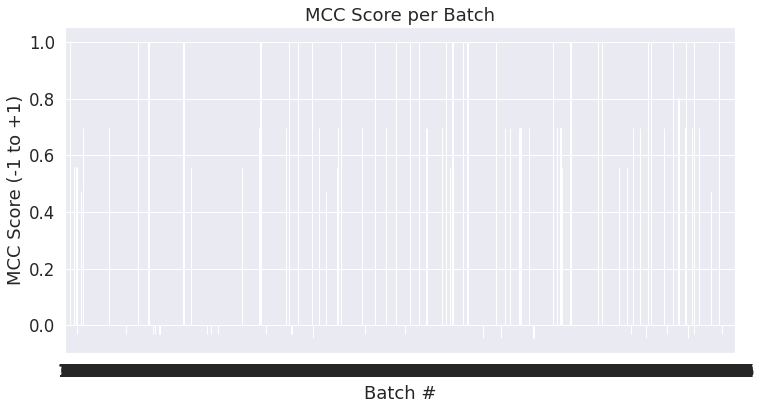

In [70]:
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [71]:
flat_predictions = np.concatenate(predictions, axis=0)
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = np.concatenate(true_labels, axis=0)
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.133


In [72]:
import os


output_dir = './model_save/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model  
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')